<center><h1>Yue_Tianlin_HW2</h1></center>
<br>
<br>

Name: Tianlin Yue
<br>
Github Username: F1neArt
<br>
USC ID: 3243438834

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

Get the Cycle Power Plant Data Set

In [2]:
df = pd.read_excel("../data/Folds5x2/Folds5x2_pp.xlsx")
print(df.head())

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


### (b) Exploring the data

#### i. rows and columns

In [3]:
rows, cols = df.shape
print(f"There are {rows} rows and {cols} cols.")

There are 9568 rows and 5 cols.


#### ii. pairwise scatterplots of all the varianbles

      AT      V       AP     RH
0  14.96  41.76  1024.07  73.17
1  25.18  62.96  1020.04  59.08
2   5.11  39.40  1012.16  92.14
3  20.86  57.32  1010.24  76.64
4  10.82  37.50  1009.23  96.62
0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64


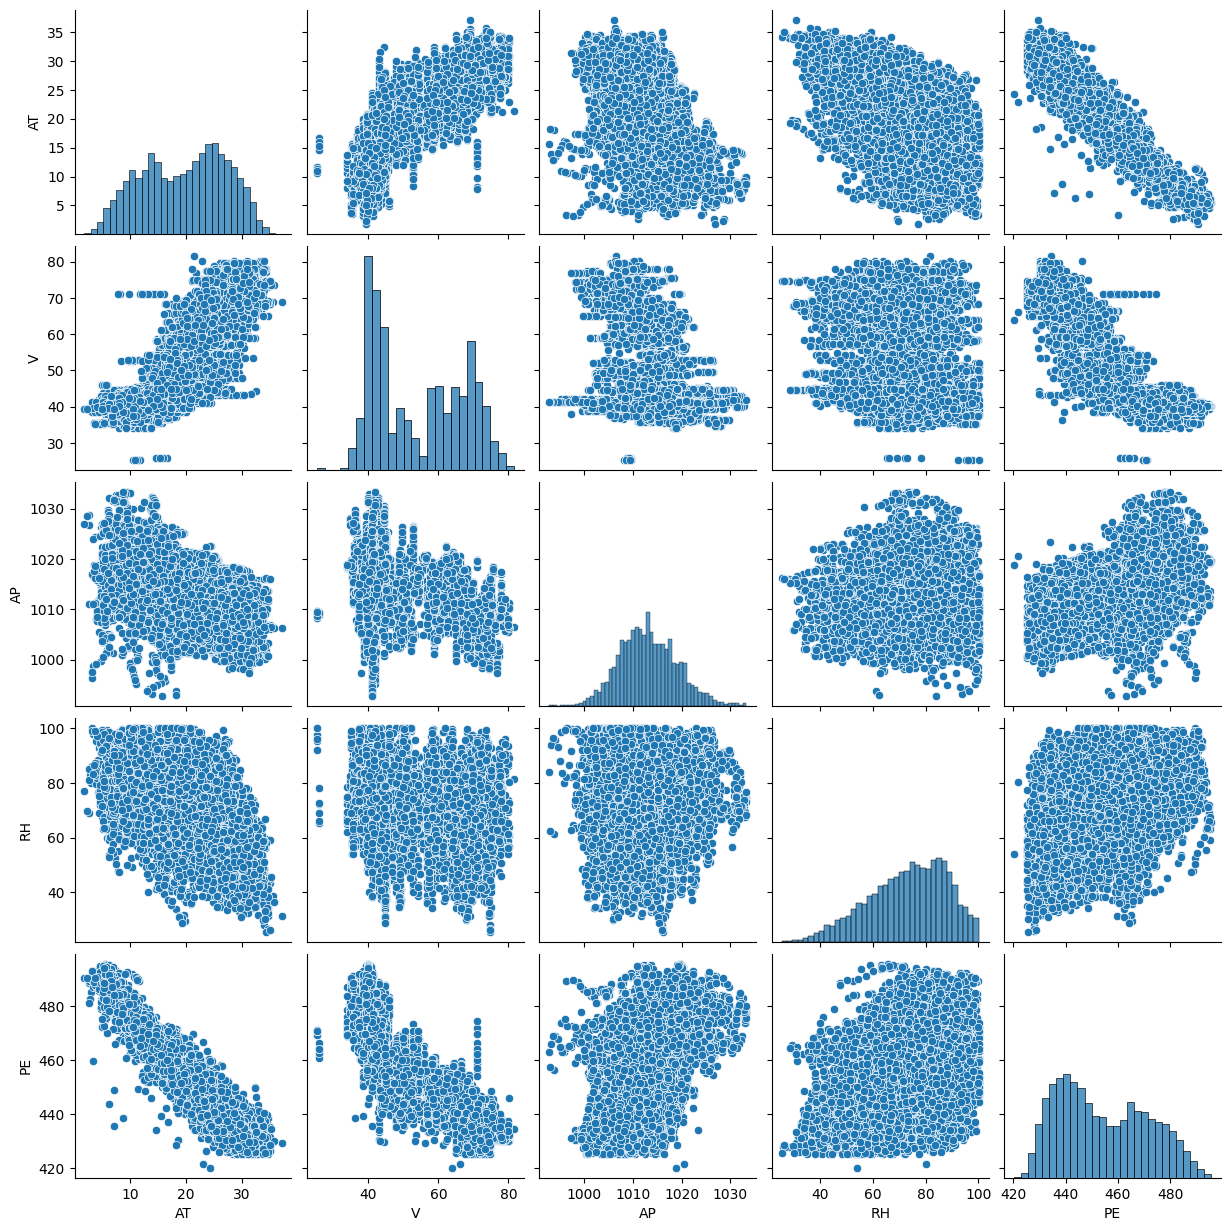

In [4]:
df_train = df.drop("PE", axis = 1)
df_result = df["PE"]
print(df_train.head())
print(df_result.head())
sns.pairplot(df)

It seems that AT and V has a strong negative linear relationship to PE while AP and RH has a moderate linear relationship with PE.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
df_train.describe()

,AT,V,AP,RH
count,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978
std,7.452473,12.707893,5.938784,14.600269
min,1.810000,25.360000,992.890000,25.560000
25%,13.510000,41.740000,1009.100000,63.327500
50%,20.345000,52.080000,1012.940000,74.975000
75%,25.720000,66.540000,1017.260000,84.830000
max,37.110000,81.560000,1033.300000,100.160000


### (c) Simple Linear Regression


 The current model is with predictor: AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 03 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:16:22   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

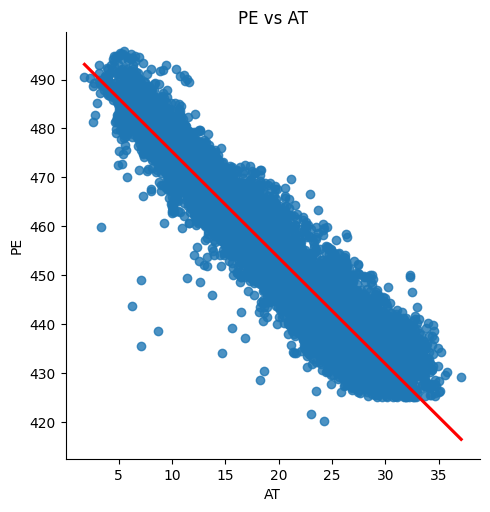

The Cook's distance plot will be displayed under


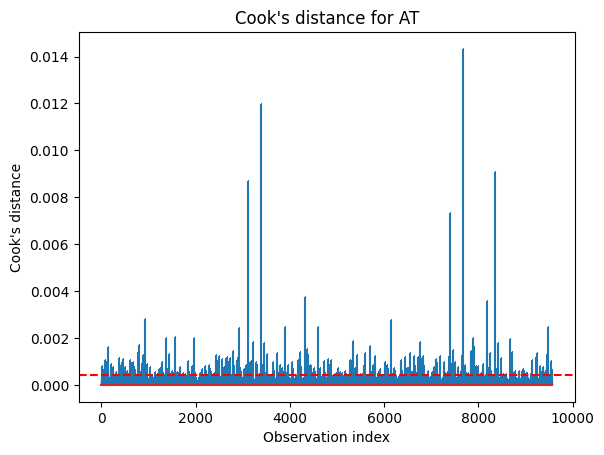


 The current model is with predictor: V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 03 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:16:23   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

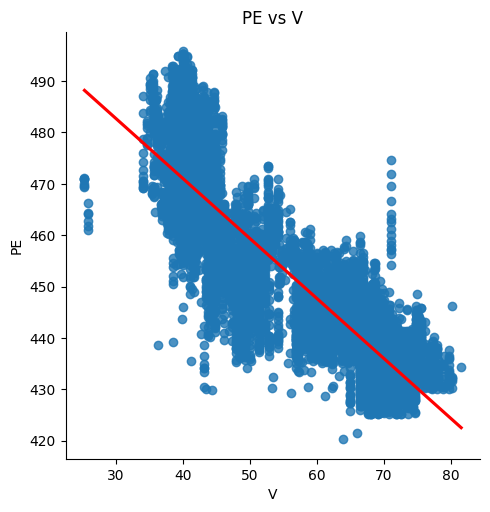

The Cook's distance plot will be displayed under


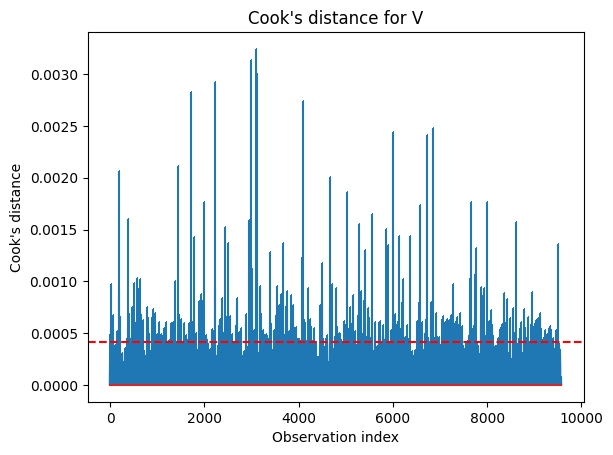


 The current model is with predictor: AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 03 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:16:24   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

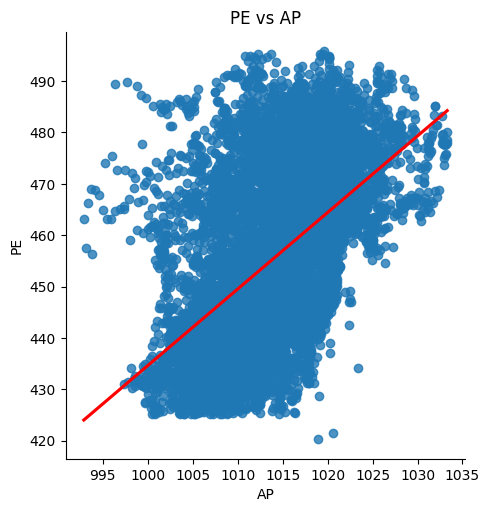

The Cook's distance plot will be displayed under


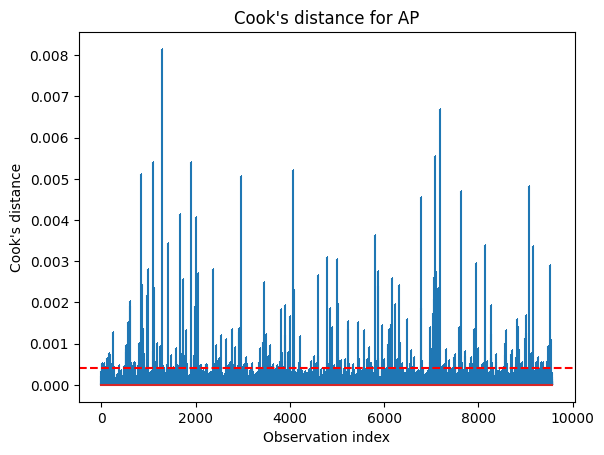


 The current model is with predictor: RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 03 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:16:25   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

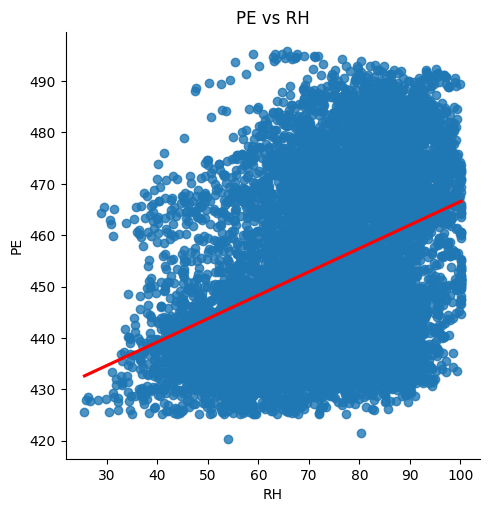

The Cook's distance plot will be displayed under


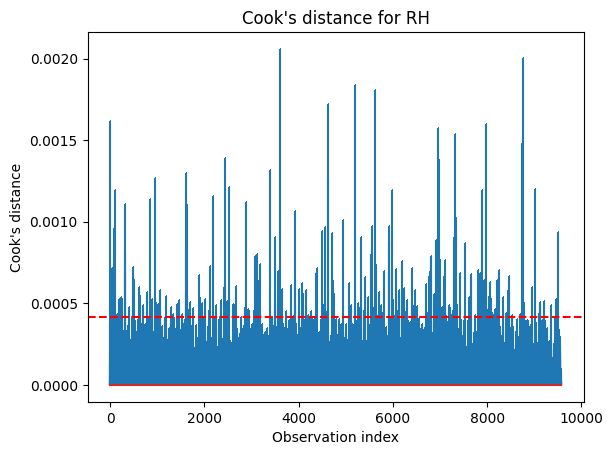

In [6]:
predictors = ["AT", "V", "AP", "RH"]
results = {}
for vari in predictors:
    X = sm.add_constant(df_train[[vari]])
    model_lr = sm.OLS(df_result, X).fit() 

    results[vari] = {"R_Square":model_lr.rsquared,
                   "P_Value":model_lr.pvalues[vari],
                   "Coefficent":model_lr.params[vari]}
    print(f"\n The current model is with predictor: {vari}")
    print(model_lr.summary())
    print("The plot for the current model will be displayed under")
    sns.lmplot(x = vari, y =  "PE", data = df, ci = None, line_kws={"color":"red"})
    plt.title(f"PE vs {vari}")
    plt.show()

    print("The Cook's distance plot will be displayed under")
    influence = model_lr.get_influence()
    (c, p) = influence.cooks_distance

    plt.stem(range(len(c)), c, markerfmt=",")
    plt.axhline(4/len(c), color='red', linestyle='--')  # rule of thumb cutoff
    plt.xlabel("Observation index")
    plt.ylabel("Cook's distance")
    plt.title(f"Cook's distance for {vari}")
    plt.show()

By looking at the simple linear regression for each of the variable, we can see that all veriables have an estimate p value of 0.000, which means they are all significant factors that affects the result of our prediction output, which is PE. There are also points that has a significantly larger effect on the result variable, but are still not impactive enough to be considered as outliers.

### (d) Multiple Regression

In [7]:
X_multi = sm.add_constant(df_train)
model_multi = sm.OLS(df_result, X_multi).fit() 
print("The result under is with the multiple linear regression model.")
print(model_multi.summary())

The result under is with the multiple linear regression model.
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 03 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:16:26   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

By looking at the reuslt for multiple linear regression, we can see that the the p values for all independent variables are 0, which is less than 0.05, so we can safely reject the null hypothesis that Betaj = 0 in this case. The R squared in the multiple linear regression model is 0.929, which means the model accuracy is high.

### (e) 1c Compare to 1d

By comparing 1c to 1d, I can see that the coefficient for all the predictor variables are different compare to simple linear regression of each variable. In 1C, we can see that the variable AP and RH seems to have a larger possitive coefficient, but in the multiple linear regression model, we can see that the coefficient of AP and RH becomes much closer to 0, with the coefficient for RH changed its signs from positive to negative. All predicotr variables still have p values of 0, which means they are still significant variables in this model. The R-squared value increased significantly from simple regression to multiple regression, which means the multiple regression includes much more information on the outcome variable and is much better at predicting the result.

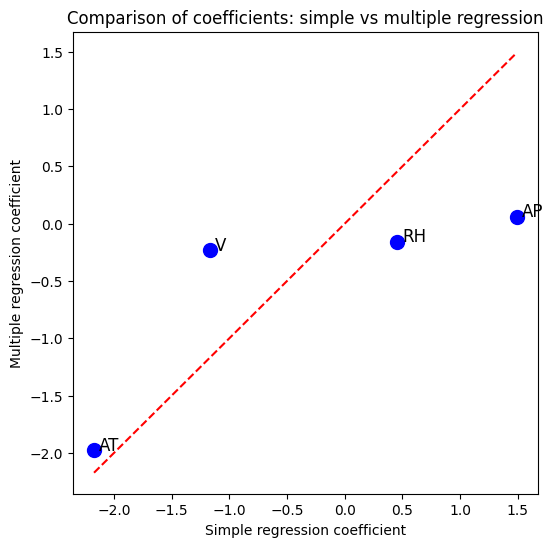

In [8]:
simple_coefs = {var: results[var]["Coefficent"] for var in predictors}
multi_coefs = model_multi.params.to_dict()

x = [simple_coefs[var] for var in predictors]
y = [multi_coefs[var] for var in predictors]

plt.figure(figsize = (6,6))
plt.scatter(x, y, s = 100, c = "blue")
for i, var in enumerate(predictors):
    plt.text(x[i]+0.04, y[i], var, fontsize = 12)
lims = [min(x + y), max(x + y)]
plt.plot(lims, lims, 'r--')

plt.xlabel("Simple regression coefficient")
plt.ylabel("Multiple regression coefficient")
plt.title("Comparison of coefficients: simple vs multiple regression")
plt.show()

### (f) Nonlinear Association

In [9]:
cubic_results = {}

for var in predictors:
    f = f"PE ~ {var} + I({var}**2) + I({var}**3)"
    model = smf.ols(f, data=df).fit()
    cubic_results[var] = model
    
    print(f"\nCubic regression for {var}")
    print(model.summary())
    
    # Test for nonlinearity (are squared and cubic terms = 0?)
    test = model.f_test([f"I({var} ** 2) = 0, I({var} ** 3) = 0"])
    print("Test for nonlinearity:", test)


Cubic regression for AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 03 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:16:26   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      

For predictor AT, we conclude that there exist nonlinear relationship with PE since the P value is less than 0.05 for all variables. The R-Sqaured value is higher meaning it could explain a larger percentage of data.\
For predictor V, we conclude that there exist nonlinear relationship with PE, but the quadratic variable is not significant compare to the cubic variable. The R-Squared value is also higher.\
For predictor AP, we conclude that there exist a nonlinear relationship with PE, because the P values are smaller than 0.05 and the F test score is huge, meaning it can significantly imporve the model if we include nonlinear features.\
For predictor RH, we conclude that there exist a nonlinear relationship with PE, but the effect might be very small because F test gives a much smaller value and the R-squared result is low.


### (g) Interactions of Predictors

In [10]:
interaction_full = smf.ols("PE ~ AT * V * AP * RH", data = df).fit()
print(interaction_full.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9568.
Date:                Fri, 03 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:16:26   Log-Likelihood:                -27450.
No. Observations:                9568   AIC:                         5.493e+04
Df Residuals:                    9552   BIC:                         5.505e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4433.5301    795.016      5.577      0.0

By looking at the result, it seems that all interaction terms are statistically significant because they have p values that are way smaller than 0.05, but it seems that only the interaction between AT and RH, AT and V, V and RH, AT and AP, do have practically significant effect because other interaction terms has smaller coefficient.

### (h) Improvement

In [11]:
train_data, test_data = train_test_split(df, test_size = 0.3, random_state = 5)

linear_multi = smf.ols("PE ~ AT + V + AP + RH", data = train_data)
linear_multi = linear_multi.fit()
train_result = linear_multi.predict(train_data)
test_result = linear_multi.predict(test_data)

train_mse = mean_squared_error(train_data['PE'], train_result)
test_mse = mean_squared_error(test_data['PE'], test_result)
print(f'The mean squared error for the train data of baseline multi-regression model is: {train_mse}.')
print(f'The mean squared error for the test data of baseline multi-regression model is: {test_mse}.')

improved_regre = smf.ols("PE ~ (AT + V + AP + RH)**2 + I(AT**2) + I(RH**2) + I(AP**2)", data = train_data)
improved_regre = improved_regre.fit()
train_result_improved = improved_regre.predict(train_data)
test_result_improved = improved_regre.predict(test_data)

improved_train_mse = mean_squared_error(train_data['PE'], train_result_improved)
improved_test_mse = mean_squared_error(test_data['PE'], test_result_improved)
print(f'The mean sqaured error for the train data of improved model is: {improved_train_mse}')
print(f'The mean sqaured error for the test data of improved model is: {improved_test_mse}')

The mean squared error for the train data of baseline multi-regression model is: 21.259161730428783.
The mean squared error for the test data of baseline multi-regression model is: 19.633725289143026.
The mean sqaured error for the train data of improved model is: 18.620472319107296
The mean sqaured error for the test data of improved model is: 16.961870870540032


### (i) KNN

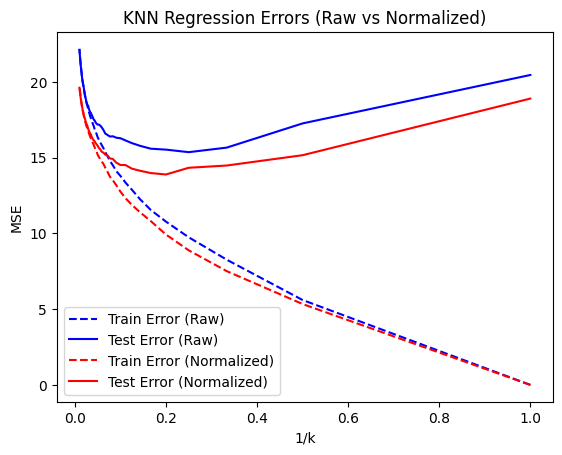

The number of K that gives the lowest test error for raw data is: 4, with MSE: 15.36486277211773.
The number of K that gives the lowest test error for normalized data is: 5, with MSE: 13.892124235458027.


In [12]:
## First using raw data
X_train = train_data.drop("PE", axis = 1)
y_train = train_data["PE"]
X_test = test_data.drop("PE", axis = 1)
y_test = test_data["PE"]
train_errors_raw, test_errors_raw = [], []

for k in range(1, 101):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    train_errors_raw.append(mean_squared_error(y_train, y_train_pred))
    test_errors_raw.append(mean_squared_error(y_test, y_test_pred))

## Now using standardized data

scaler = StandardScaler
X_train_scaled = scaler().fit_transform(X_train)
X_test_scaled = scaler().fit_transform(X_test)
train_errors_scaled, test_errors_scaled = [], []

for k in range(1, 101):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    
    train_errors_scaled.append(mean_squared_error(y_train, y_train_pred))
    test_errors_scaled.append(mean_squared_error(y_test, y_test_pred))

plt.plot(1/np.arange(1,101), train_errors_raw, label = "Train Error (Raw)", color = "blue", linestyle = "--")
plt.plot(1/np.arange(1,101), test_errors_raw, label = "Test Error (Raw)", color = "blue")

plt.plot(1/np.arange(1,101), train_errors_scaled, label = "Train Error (Normalized)", color = "red", linestyle ="--")
plt.plot(1/np.arange(1,101), test_errors_scaled, label = "Test Error (Normalized)", color = "red")

plt.xlabel("1/k")
plt.ylabel("MSE")
plt.title("KNN Regression Errors (Raw vs Normalized)")
plt.legend()
plt.show()

print(f"The number of K that gives the lowest test error for raw data is: {np.argmin(test_errors_raw) + 1}, with MSE: {min(test_errors_raw)}.")
print(f"The number of K that gives the lowest test error for normalized data is: {np.argmin(test_errors_scaled) + 1}, with MSE: {min(test_errors_scaled)}.")

### (j ) Compare KNN and Linear

In our KNN model, our lowest mse is 13.89 with a K equals to 5. In our improved linear regression model, our lowest mse is 16.96. Although KNN performs a little bit better, it is harder for us to get the meaning behind the model.

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

A flexible model would be better because large amount of data would keep the variance low and small amount of p would keep the flexible model away from the curse of dimensionality, therefore a flexible model would be better.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

A less flexible model would be better because we have a small number of predictors, and a less flexible model would help us avoid the curse of dimensionality. A flexible model with low bias and high variance would be very dangerous here because we have a way larger amount of predictors so the curse of dimensionality would happen.

### (c) The relationship between the predictors and response is highly non-linear.

Flexible model would perform better here because if the relationship between the predictors and resposne is highly non-linear, large bias would be generated using less flexible model. Flexible model could adapt well to the relationship and reduce the bias.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

Flexible model would perform worse here because a higher variance of the error terms means the data is noisy, and more flexible model would probably chase after the noise therefore making less accurate decision.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [13]:
df_q3 = pd.DataFrame({
    "Obs." : [1, 2, 3, 4, 5, 6],
    "X1" : [0, 2, 0, 0, -1, 1],
    "X2" : [3, 0, 1, 1, 0, 1],
    "X3" : [0, 0, 3, 2, 1, 1],
    "y" : ["Red", "Red", "Red", "Green", "Green", "Red"]
})

x0 = np.array([0, 0, 0])

# Euclidean distances
X = df_q3[["X1", "X2", "X3"]].to_numpy()
dists = np.linalg.norm(X - x0, axis = 1)
df_q3["dist"] = dists
# sort distances
df_q3 = df_q3.sort_values(by = "dist")
print(df_q3)

   Obs.  X1  X2  X3      y      dist
4     5  -1   0   1  Green  1.414214
5     6   1   1   1    Red  1.732051
1     2   2   0   0    Red  2.000000
3     4   0   1   2  Green  2.236068
0     1   0   3   0    Red  3.000000
2     3   0   1   3    Red  3.162278


### (b) What is our prediction with K = 1? Why?

When K = 1, we will have our result to be classified as Green, because the closest point is green.

### (c) What is our prediction with K = 3? Why?

When K = 3, we will have our result to be classified as Red, becasue for the 3 closest points, we have 2 red and 1 green point, so the red point wins.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

K would be small, because when K is very small, the model is more flexible and has higher variance, which makes the decision boundary nonlinear. When K is large, the effect of single point gets flatten by the large sample sizes, and therefore would produce a more smooth decision boundary.